In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 7.0 MB/s 


Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 628GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Reading /content/drive/MyDrive/MT_ML_Decoding/Aversive_state_reactivation/notebooks/templates/data/derivatives/preprocessing/sub-001/localiser/sub-001_ses-01_task-AversiveLearningReplay_run-localiser_proc_ICA-epo.fif.gz ...
    Read 5 compensation matrices
    Found the data of interest:
        t =    -500.00 ...     790.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using matplotlib as 2D backend.
Opening epochs-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


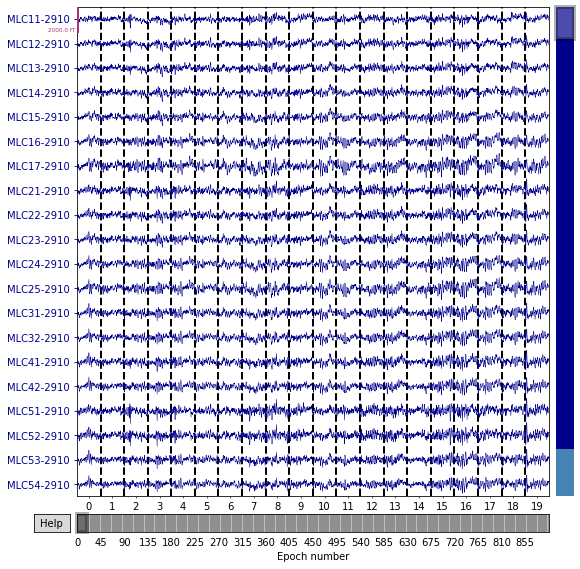

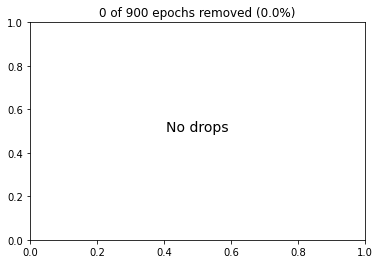

In [3]:
# 引入python库
import mne
import os
from mne.datasets import sample
import matplotlib.pyplot as plt

# sample的存放地址
# data_path = sample.data_path()
# 该fif文件存放地址
#fname = 'E:\Proj\Previous data\ds003682\sub-001\ses-01\meg\sub-001_ses-01_task-AversiveLearningReplay_run-01_meg.fif' #corrupted
#fname = 'E:\Proj\Previous data\sample\MEG\sample\sample_audvis_raw.fif' # testsample data
fname = '/content/drive/MyDrive/MT_ML_Decoding/Aversive_state_reactivation/notebooks/templates/data/derivatives/preprocessing/sub-001/localiser/sub-001_ses-01_task-AversiveLearningReplay_run-localiser_proc_ICA-epo.fif.gz'

epochs = mne.read_epochs(fname)
#raw = mne.io.read_raw(fname)
#events = mne.find_events(epochs)
#events = mne.find_events(raw, stim_channel=None)

"""
案例：
获取10-20秒内的良好的MEG数据

# 根据type来选择 那些良好的MEG信号(良好的MEG信号，通过设置exclude="bads") channel,
结果为 channels所对应的的索引
"""
#epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5)
#events = mne.find_events(epochs)
#print(epochs.event_id)

'''picks = mne.pick_types(raw.info, meg=True, ref_meg=False, exclude='bads')
t_idx = raw.time_as_index([10., 20.])
data, times = raw[picks, t_idx[0]:t_idx[1]]
plt.plot(times,data.T)
plt.title("Sample channels")
plt.show()'''

picks = mne.pick_types(epochs.info, meg=True, ref_meg=False, exclude='bads')

#t_idx = epochs.time_as_index([10., 20.])
epochs.plot(block=True)

epochs.plot_drop_log()

#SSP矢量图
#epochs.plot_projs_topomap()
plt.show()

#'''event_id = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '32': 32}
#color = {1: 'green', 2: 'yellow', 3: 'red', 4: 'c', 5: 'black', 32: 'blue'}
#mne.viz.plot_events(events, epochs.info['sfreq'], raw.first_samp, color=color,
#event_id=event_id)
#plt.show()'''

In [7]:
epochs

Number of events,900
Events,stimulus_10: 61stimulus_12: 66stimulus_14: 63stimulus_16: 65stimulus_18: 63stimulus_2: 64stimulus_20: 65stimulus_22: 65stimulus_24: 63stimulus_26: 65stimulus_28: 65stimulus_4: 65stimulus_6: 66stimulus_8: 64
Time range,-0.500 – 0.790 sec
Baseline,-0.500 – 0.000 sec


Reading E:\Proj\sample\MEG\sample\sub-001_localiser_sub-001_ses-01_task-AversiveLearningReplay_run-localiser_proc_ICA-epo.fif.gz ...
    Read 5 compensation matrices
    Found the data of interest:
        t =    -500.00 ...     790.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated


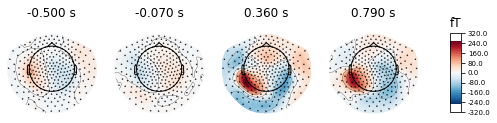

In [ ]:
epochs = mne.read_epochs(fname)

evoked = epochs.average()
evoked.plot_topomap()

plt.show()

Removing 5 compensators from info because not all compensation channels were picked.


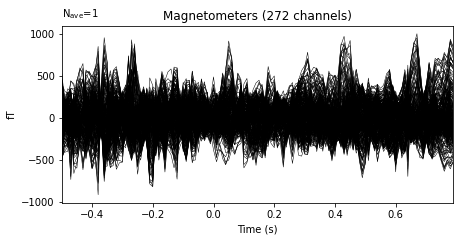

Removing 5 compensators from info because not all compensation channels were picked.


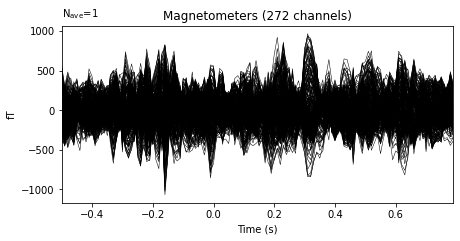

Removing 5 compensators from info because not all compensation channels were picked.


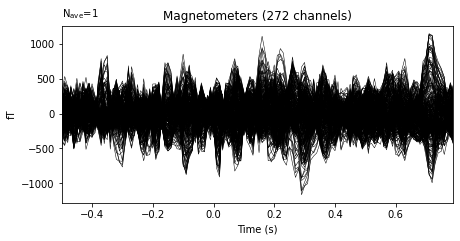

Removing 5 compensators from info because not all compensation channels were picked.


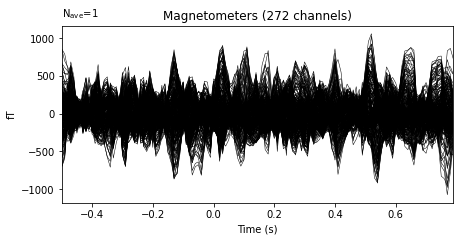

Removing 5 compensators from info because not all compensation channels were picked.


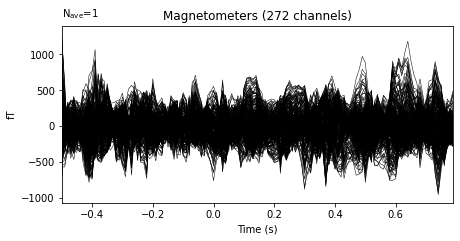

Removing 5 compensators from info because not all compensation channels were picked.


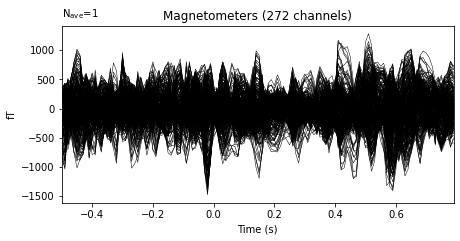

In [ ]:
availabe_event = [1, 2, 3, 4, 5, 32]
for i in availabe_event:
    evoked_i = epochs[i].average(picks=picks)
    epochs_i = epochs[i]
    evoked_i.plot(time_unit='s')
    plt.show()